In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
Iris = pd.read_csv('iris.csv')

In [4]:
Iris.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,11,5.4,3.7,1.5,0.2,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-virginica
41,42,4.5,2.3,1.3,0.3,Iris-setosa
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
110,111,6.5,3.2,5.1,2.0,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
Iris = Iris.fillna(Iris.median())

In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
Iris['Species'] = Iris['Species'].astype('category').cat.codes.astype('int')

In [9]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
Iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,2
148,149,6.2,3.4,5.40,2.3,2
149,150,5.9,3.0,5.10,1.8,2
150,151,5.9,3.0,4.35,1.3,2
151,152,5.8,3.0,4.35,1.8,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [11]:
Iris.corrwith(Iris['Species'])

Id               0.942753
SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
dtype: float64

In [12]:
#no need to drop any column as none fall under the range of -0.1 to 0.1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [13]:
Iris.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [14]:
#There is no variance less than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

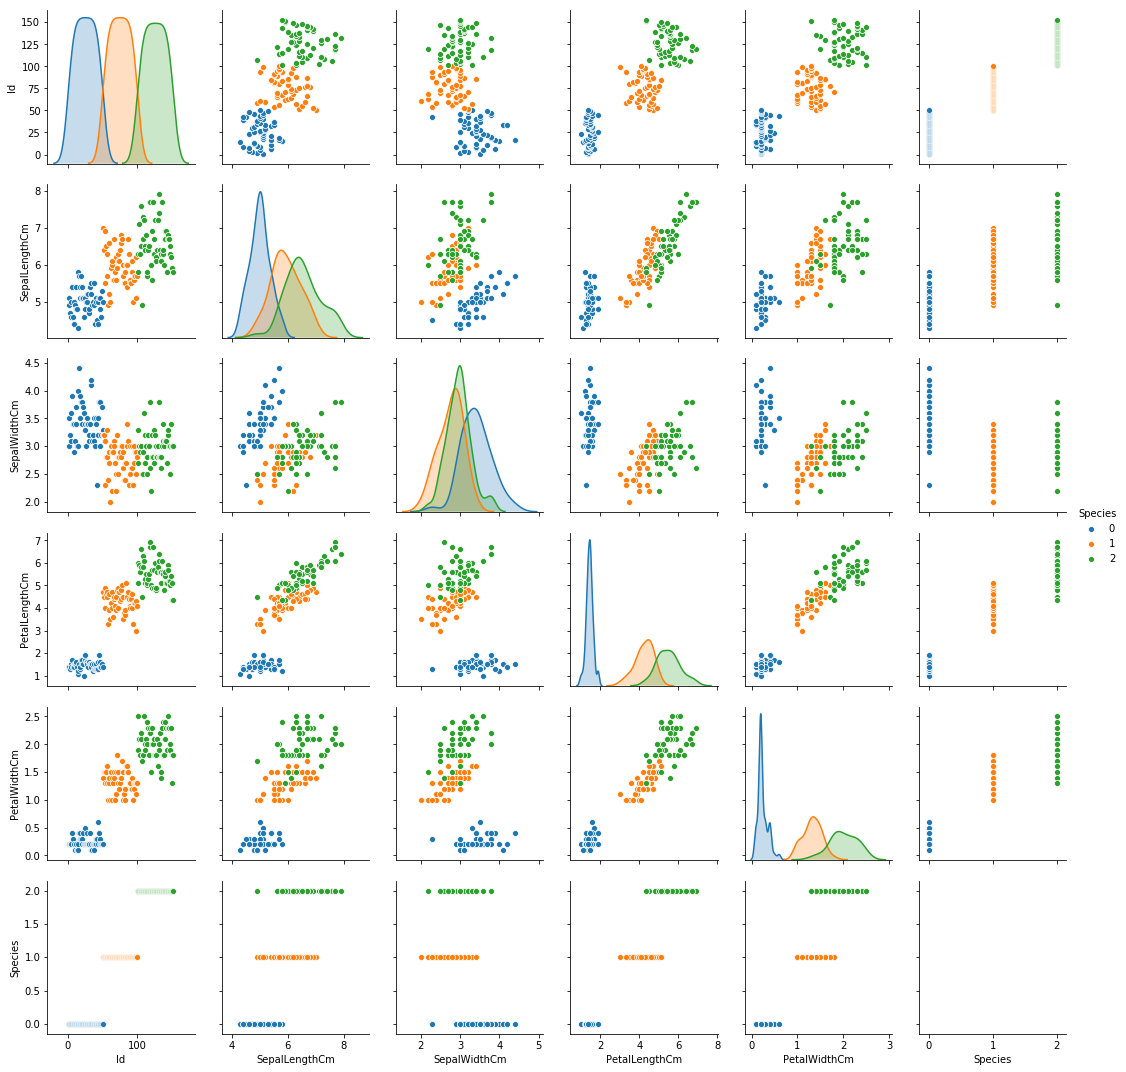

In [15]:
sns.pairplot(Iris,hue='Species')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
Iris_X = Iris.drop(['Id','Species'],axis=1)
Iris_Y = Iris['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Iris_X, Iris_Y, test_size=0.20, random_state=10)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [19]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaler = sc.transform(X_train)
X_test_scaler = sc.transform(X_test)

In [24]:
# k_range = [3]

# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train_scaler, y_train)    
# y_predict = knn.predict(X_test_scaler)
# print('y_predict',y_predict)
# print('X_test',X_test)
# print("Accuracy Score with k value=",k," is ",metrics.accuracy_score(y_test, y_predict))

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaler, y_train)    
y_predict = knn.predict(X_test_scaler)
print('y_predict',y_predict)
print('X_test',X_test)
print("Accuracy Score with k value=",k," is ",metrics.accuracy_score(y_test, y_predict))

y_predict [2 2 0 2 0 2 0 1 1 1 2 2 1 0 0 1 1 1 0 2 1 1 0 1 2 1 0 1 2 1 2]
X_test      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
146            6.3           2.5           5.00           1.9
148            6.2           3.4           5.40           2.3
10             5.4           3.7           1.50           0.2
108            6.7           2.5           5.80           1.8
49             5.0           3.3           1.40           0.2
105            7.6           3.0           6.60           2.1
24             4.8           3.4           1.90           0.2
91             6.1           3.0           4.60           1.4
68             6.2           2.2           4.50           1.5
85             6.0           3.4           4.50           1.6
114            5.8           2.8           5.10           2.4
144            6.7           3.3           5.70           2.5
55             5.7           2.8           4.50           1.3
1              4.9           3.0           1.40    

In [31]:
X_test_scaler[0]

array([ 0.58777537, -1.28362673,  0.73608136,  0.94067266])

In [26]:
import pickle 

In [29]:
pickle.dump(knn, open('pickle_model_folder/final_prediction.pickle', 'wb'))